<a href="https://colab.research.google.com/github/Harsha77064/Machine-Learning/blob/main/Social_Media_dataset_using_AdaBoostClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('social.csv')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
import seaborn as sb

In [ ]:
gender1={'Male':1,'Female':0}

In [ ]:
data['Gender'].replace(gender1,inplace=True)

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
data.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [ ]:
import matplotlib.pyplot as plt


<Axes: >

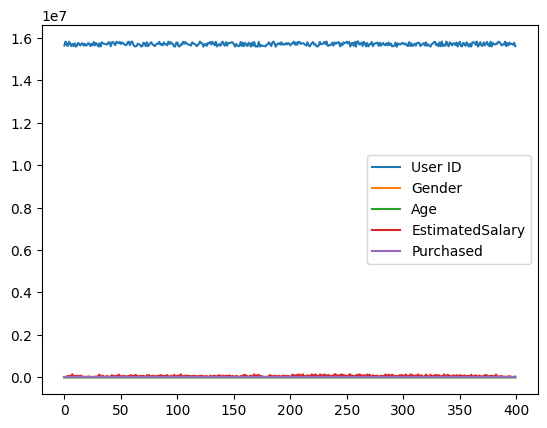

In [ ]:
data.plot()

In [ ]:
plt.show()

<Axes: >

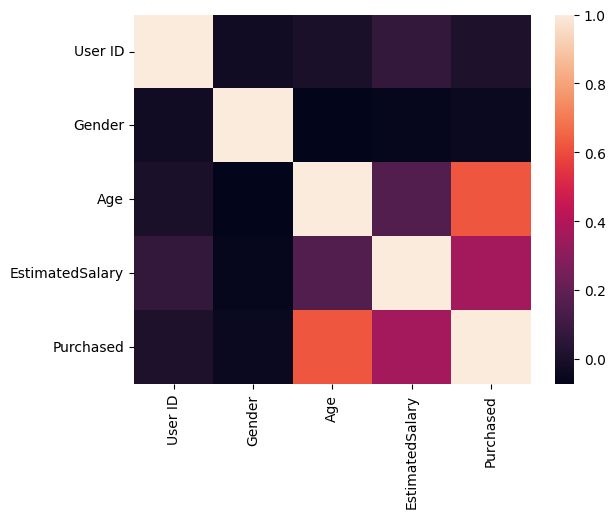

In [ ]:
sb.heatmap(data.corr())

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
data.drop("User ID",axis=1,inplace=True)

In [ ]:
x=data.drop("Purchased",axis=1)

In [ ]:
y=data.Purchased

In [ ]:
x.shape

(400, 3)

In [ ]:
y.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.4))

In [ ]:
x_train.shape


(240, 3)

In [ ]:
y_train.shape

(240,)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model=AdaBoostClassifier(n_estimators=8)

In [ ]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=8)

In [ ]:
x_test.shape

(160, 3)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.85625

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.86      0.88       102\n           1       0.78      0.84      0.81        58\n\n    accuracy                           0.86       160\n   macro avg       0.84      0.85      0.85       160\nweighted avg       0.86      0.86      0.86       160\n'

In [ ]:
confusion_matrix(y_test,y_pred)

array([[88, 14],
       [ 9, 49]])